# Facebook Commenter Analytics (Commenter)
----
In this notebook, we will explore user that has comment many comment and see their behavior.

In [2]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('font',family='JasmineUPC')
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 
%matplotlib inline

In [3]:
import plotly 
plotly.tools.set_credentials_file(username='TeerapatChaiwachirasak', api_key='RMqZv6z9pSmGeRafgNnS')
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
#Test reading from .tsv
commentDf = pd.read_csv('../dataset/facebook_comment.tsv',sep ='\t')
commentDf['message'] = np.nan_to_num(commentDf['message'])
commentDf = commentDf[['commenter_name','created_time','like_count','message','service']]
commentDf['created_date'] = pd.to_datetime(commentDf['created_time'], format='%Y-%m-%d %H:%M:%S.%f')
commentDf['created_date_format'] = commentDf['created_date'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
commentDf['service'][commentDf['service']==True] = 'TRUE'
commentDf.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



commenter_name         created_time  like_count  \
0           Nui Worabut  2016-06-01 12:53:00         1.0   
1   Chandratithaya Je-u  2016-06-02 17:17:32         0.0   
2  Hataichanok Maklamai  2016-06-02 07:51:45         0.0   
3      Nattapong Wongsa  2016-06-02 15:43:53         1.0   
4        Jitsak Sisawad  2016-06-02 15:09:06         0.0   

                                             message service  \
0  ‡πÉ‡∏ä‡πâ‡πÇ‡∏õ‡∏£‡πÄ‡∏™‡∏£‡∏¥‡∏° net non..9 gb  ‡πÉ‡∏ä‡πâ‡∏´‡∏°‡∏î‡∏•‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏£‡πá‡∏ß‡πÑ‡∏°‡πà...    DTAC   
1  ‡πÉ‡∏ä‡πâ‡∏î‡∏µ‡πÅ‡∏ó‡∏Ñ ‡πÅ‡∏•‡πâ‡∏ß‡∏õ‡∏ß‡∏î‡πÉ‡∏à‡∏à‡∏£‡∏¥‡∏á‡πÜ ‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ô‡∏Ç‡∏≤‡∏î‡∏´‡∏≤‡∏¢ ‡∏≠‡∏¥‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ...    DTAC   
2  ‡∏™‡πà‡∏á‡∏Ç‡∏≠‡∏°‡∏π‡∏•‡πÑ‡∏õ‡∏ó‡∏≤‡∏á ib ‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏ï‡∏≠‡∏ö‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡∏∞ ‡∏™‡πà‡∏á‡πÑ‡∏õ...    DTAC   
3   ‡∏≠‡∏∞‡πÑ‡∏£‡∏ô‡∏µ‡πâ...‡πÑ‡∏°‡πà‡πÄ‡∏õ‡∏¥‡∏î‡πÉ‡∏´‡πâ‡πÄ‡∏ï‡∏¥‡∏°‡πÄ‡∏Å‡∏°‡∏™‡πå‡πÉ‡∏ä‡πâ‡∏õ‡∏∞  ‡∏à‡∏∞‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¥‡∏Å‡πÉ‡∏ä‡πâ    DTAC   
4  ‡∏´‡πà‡∏ß‡∏¢‡πÅ‡∏ï‡∏Å‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡πÅ‡∏à‡πâ‡∏á‡∏Ç‡πà‡∏≤‡∏ß‡∏™‡∏≤‡∏£‡πÉ‡∏´‡πâ‡∏•‡∏π‡∏Å ‡∏≠‡∏¢‡∏π‡πà‡πÜ‡∏Å‡πâ‡∏°‡∏≤‡πÄ‡∏Å‡πá‡∏ö‡∏Ñ‡πà...    DTAC   

         created_date created_date_format  
0 2016-06-01 12:53:00          2016-06-01  
1 2016-06-02 17:17:32          2016-06-02  
2 2016-06-02 07:51:45          2016-06-02  
3 2016-06-02 15:43:53          2016-06-02  
4 2016-06-02 15:09:06          2016-06-02

## Here we are going to look at top commenters (commenter whose comment a lot)
---------------------------

In [5]:
commentDf['commenter_name'].value_counts().head(10)

‡∏ò‡∏ô‡∏¥‡∏î ‡∏†‡∏±‡∏ó‡∏£‡∏Å‡∏¥‡∏ï‡∏ï‡∏¥      1830
‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå ‡∏î‡πâ‡∏≤           548
TrueMove H           399
AIS                  237
Joe KonTummada       182
Kittithat Tri        177
Artinut Nopparat     156
Bosa Bisabo          142
‡πÄ‡∏ä‡∏¢‡∏Å‡∏•‡∏¥‡πà‡∏ô ‡πÅ‡∏•‡πâ‡∏ß‡∏á‡∏±‡∏¢     140
Back Green           139
Name: commenter_name, dtype: int64

## Let's also find top 3 commenter for each of the service provider
--------

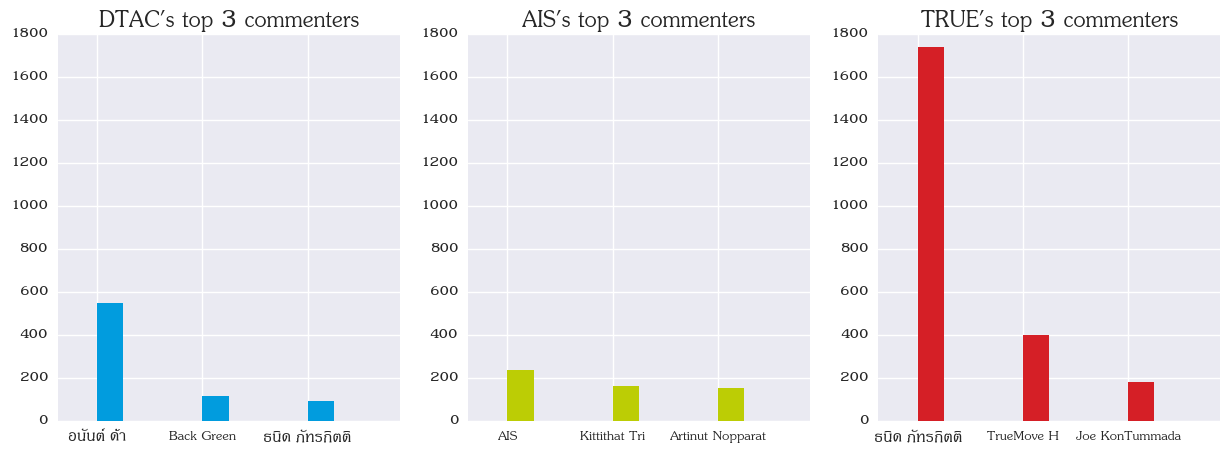

In [6]:
def topCommenter():
    colors = ['#019CDE','#BCCD05','#D51F26']
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for i,service in enumerate(['DTAC','AIS','TRUE']):
        topCommenter = commentDf['commenter_name'][commentDf['service']==service].value_counts().head(3)
        ax[i].bar([0.75,2.75,4.75],topCommenter,width=0.5,color=colors[i],edgecolor = "none")
        ax[i].set_xlim((0,6.5))
        ax[i].set_ylim((0,1800))
        ax[i].set_title(service+"'s top 3 commenters",fontsize=25)
        ax[i].set_xticks([0.75,2.75,4.75])
        ax[i].set_xticklabels(topCommenter.index.values)    
    plt.show()
topCommenter()

### Let's focus on ‡∏Ñ‡∏∏‡∏ì ‡∏ò‡∏ô‡∏¥‡∏î ‡∏†‡∏±‡∏ó‡∏£‡∏Å‡∏¥‡∏ï‡∏ï‡∏¥ first.
-----------

‡∏ò‡∏ô‡∏¥‡∏î ‡∏†‡∏±‡∏ó‡∏£‡∏Å‡∏¥‡∏ï‡∏ï‡∏¥ has 1830 comments.
Sample comment : 
‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÄ‡∏à‡πâ‡∏≤‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏ó‡∏£‡∏π‡∏ó‡∏∏‡∏Å‡∏ó‡πà‡∏≤‡∏ô ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏ó‡∏µ‡πà‡∏ú‡∏°‡∏ñ‡∏≤‡∏°‡πÉ‡∏ô‡∏≠‡∏¥‡∏ô‡∏ö‡πá‡∏≠‡∏Å‡∏ã‡πå ‡∏°‡∏µ‡∏Ñ‡∏≥‡∏ï‡∏≠‡∏ö‡∏´‡∏£‡∏∑‡∏≠‡∏¢‡∏±‡∏á‡∏Ñ‡∏£‡∏±‡∏ö
----
‡∏´‡∏≤‡∏Å‡πÉ‡∏Ñ‡∏£‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ñ‡∏π‡∏Å‡∏•‡∏∞‡πÄ‡∏°‡∏¥‡∏î‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡πå ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡∏ô‡∏≥‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÑ‡∏õ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏©‡∏±‡∏ó‡πÉ‡∏î‡πÜ‡∏™‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Å‡∏ß‡∏ô‡πÉ‡∏à ‡πÅ‡∏à‡πâ‡∏á‡πÅ‡∏•‡πâ‡∏ß‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏´‡∏¢‡∏∏‡∏î ‡∏£‡πâ‡∏≠‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ‡∏Å‡∏™‡∏ó‡∏ä. ‡πÇ‡∏ó‡∏£ 1200 ‡∏ü‡∏£‡∏µ‡∏Ñ‡∏£‡∏±‡∏ö
----
‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ß‡∏≤‡∏ô‡πÄ‡∏ã‡πÄ‡∏ß‡πà‡∏ô‡∏™‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏ï‡∏≤‡∏°‡πÑ‡∏ü‡∏•‡πå‡πÅ‡∏ô‡∏ö ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡∏ä‡∏≤‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏ú‡∏°‡πÄ‡∏Ñ‡∏¢‡∏£‡πâ‡∏≠‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏ó‡∏£‡∏π‡πÉ‡∏´‡πâ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡πÅ‡∏•‡∏∞‡∏Ç‡∏≠‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï‡∏¥‡∏ó‡

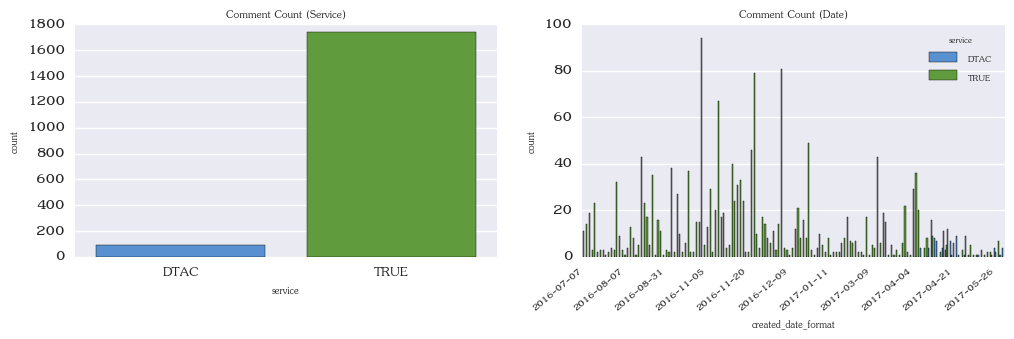

In [14]:
def commentFromUser(name):
    return commentDf[commentDf['commenter_name']==name]
from datetime import datetime

def analyzeUserComment(name):
    color = ['dark sky blue','grass','reddish orange']
    colors = sns.xkcd_palette(color)
    comment = commentFromUser(name)
    print("%s has %d comments."%(name,comment.shape[0]))
    print("Sample comment : ")
    fig, axs = plt.subplots(ncols=2,figsize=(12,3))
    sns.countplot(x="service", data=comment,palette=colors,ax=axs[0])
    axs[0].set_title('Comment Count (Service)')
    sns.countplot(x="created_date_format", data=comment,hue='service',palette=colors,ax=axs[1])
    #axs[1].set_xticks([])
    #axs[1].set_xticklabels([])d = ts
    dateStr = [str(i)[10:20] for i in list(axs[1].get_xticklabels())]
    if(len(dateStr)>=10):
        dateStr = [date if (i%int(len(dateStr)/10))==0  else "" for i,date in enumerate(dateStr) ]
        
    axs[1].set_xticklabels(dateStr, rotation=40, ha="right",size=10)
    axs[1].set_title('Comment Count (Date)')
    for comment in comment[['message','created_date_format','service']].sample(7).sort_values('created_date_format')['message'].values:
        print(comment)
        print("----")
    
    return 
analyzeUserComment('‡∏ò‡∏ô‡∏¥‡∏î ‡∏†‡∏±‡∏ó‡∏£‡∏Å‡∏¥‡∏ï‡∏ï‡∏¥')

As you can see, most of the comment are negative towards TRUE (and little bit to DTac). We can assume that he is very active in using social media given the amount of comment he did.

### Moving on, let's see top commenter from Dtac
--------

‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå ‡∏î‡πâ‡∏≤ has 548 comments.
Sample comment : 
‡∏Å‡∏≤‡∏Å‡∏°‡∏≤‡∏Å
#‡∏¢‡πâ‡∏≥‡∏Å‡∏≤‡∏Å‡∏°‡∏≤‡∏Å :-\
----
‡∏Å‡πä‡∏≤‡∏Å‡∏Å‡∏≤‡∏Å‡∏Å‡πä‡∏≤‡∏Å‡∏Å‡∏≤‡∏Å
----
‡πÇ‡∏Ñ‡∏ï‡∏£‡∏Å‡∏≤‡∏Å‡πÄ‡∏ô‡πá‡∏ï‡∏´‡∏°‡∏∏‡∏ô‡πÄ‡∏õ‡πá‡∏ô"‡∏Æ‡∏π‡∏•‡∏≤‡∏Æ‡∏π‡∏ö"‡πÄ‡∏•‡∏¢‡∏°‡∏∂‡∏á
----
‡∏Ñ‡∏ß‡∏¢
----
‡∏Ñ‡∏ß‡∏¢ ‡πÑ‡∏≠‡πâ‡πÄ‡∏´‡∏µ‡πâ‡∏¢ ‡∏Ñ‡∏ß‡∏¢‡πÜ‡πÜ‡πÜ‡πÜ‡πÜ‡πÜ‡πÜ
----
nan
----
nan
----


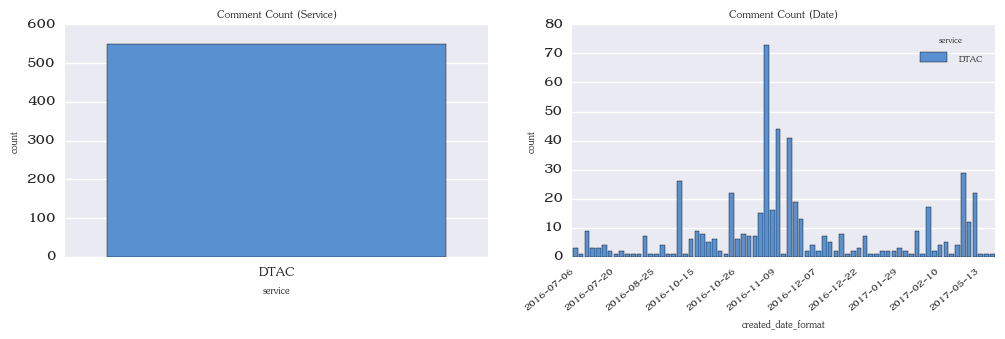

In [18]:
analyzeUserComment('‡∏≠‡∏ô‡∏±‡∏ô‡∏ï‡πå ‡∏î‡πâ‡∏≤')

Quite similar to previous commenter.

### Let's look at  ‡∏Ñ‡∏∏‡∏ì Back Green.
--------------------

Back Green has 139 comments.
Sample comment : 
‡∏à‡∏∞‡πÑ‡∏°‡πà‡πÑ‡∏´‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏∞‡πÑ‡∏≠‡∏™‡∏≤‡∏î
----
‡∏ñ‡∏∏‡∏¢‡πÑ‡∏≠‡∏™‡∏≤‡∏î
----
‡πÑ‡∏≠‡∏Ñ‡∏ß‡∏¢‡∏Å‡∏≤‡∏Å ‡∏ó‡∏∏‡∏Å ‡∏ß‡∏±‡∏ô ‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ô‡∏Å‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏¢‡πÅ‡∏Å‡πâ‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡πÑ‡∏î‡πâ ‡πÑ‡∏õ ‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á‡∏Ñ‡∏ß‡∏≤‡∏¢ ‡πÑ‡∏õ ‡∏™‡∏≤‡∏î
----
‡∏ñ‡∏∏‡∏¢
----
‡πÄ‡∏ô‡πá‡∏ï‡∏Å‡∏≤‡∏Å‡∏™‡∏≤‡∏î‡∏´‡∏°‡∏≤
----
‡∏Å‡∏≤‡∏Å‡∏î‡∏µ‡πÑ‡∏≠‡∏™‡∏≤‡∏î
----
‡∏ó‡∏≥‡πÄ‡∏ô‡πá‡∏ï‡πÉ‡∏´‡πâ‡∏î‡∏µ‡∏Å‡∏ß‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏´‡∏ô‡πà‡∏≠‡∏¢‡πÄ‡∏´‡∏≠‡∏∞
----


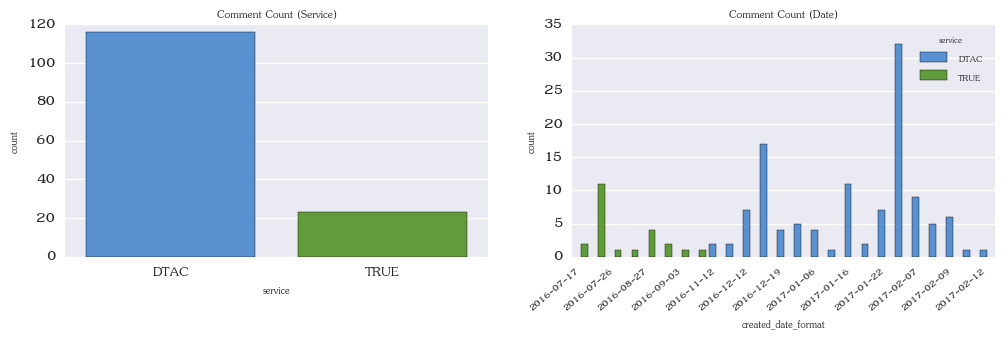

In [19]:
analyzeUserComment('Back Green')

## You can see how the comment shift from True to Dtac. 
-----------------------
This might mean that he/she moved from True to Dtac. From here, we might be able to find churn rate,date just from social media.

TrueMove H has 399 comments.
Sample comment : 
‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÇ‡∏õ‡∏£‡πÇ‡∏°‡∏ä‡∏±‡πà‡∏ô‡πÅ‡∏û‡πá‡∏Å‡πÄ‡∏Å‡∏à‡∏£‡∏≠‡∏á‡∏£‡∏±‡∏ö‡∏ó‡∏±‡πâ‡∏á  4G/3G/EDGE/GPRS ‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏±‡∏ô‡πÑ‡∏î‡πâ‡∏õ‡∏Å‡∏ï‡∏¥‡∏Ñ‡∏£‡∏±‡∏ö‡∏ú‡∏°
----
‡∏Ç‡∏≠‡∏≠‡∏†‡∏±‡∏¢‡πÉ‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÑ‡∏°‡πà‡∏™‡∏∞‡∏î‡∏ß‡∏Å‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡∏°‡∏á‡∏≤‡∏ô‡∏¢‡∏¥‡∏ô‡∏î‡∏µ‡∏£‡∏±‡∏ö‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÉ‡∏´‡πâ‡∏Ñ‡∏£‡∏±‡∏ö ‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡πÅ‡∏à‡πâ‡∏á‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏•‡∏Ç‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô ‡∏£‡∏∏‡πà‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠ ‡∏ä‡πà‡∏ß‡∏á‡∏ß‡∏±‡∏ô‡πÄ‡∏ß‡∏•‡∏≤‡πÅ‡∏•‡∏∞‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ó‡∏µ‡πà‡∏û‡∏ö‡∏ó‡∏≤‡∏á inbox (‡∏ä‡πà‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°) ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏≥‡πÄ‡∏ô‡∏¥‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏£‡∏±‡∏ö (‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÑ‡∏£‡πÅ‡∏•‡πâ‡∏ß‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏Å‡∏î‡πÄ‡∏õ‡∏¥‡∏î‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÄ‡∏ô‡πá‡∏ó‡∏î‡∏π‡∏Å‡πà‡∏≠‡∏ô‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö ‡πÇ‡∏î‡∏¢‡∏Å‡∏î *902*01# ‡πÇ‡∏ó‡∏£‡∏≠‡∏≠‡

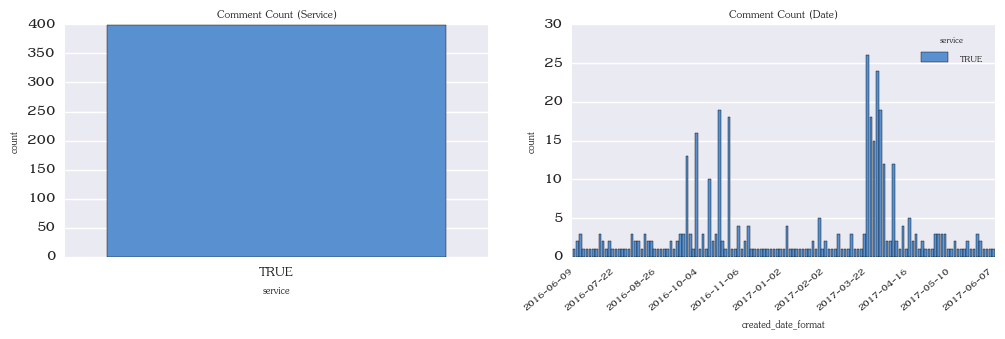

In [23]:
analyzeUserComment('TrueMove H')

AIS has 237 comments.
Sample comment : 
‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô‡πÅ‡∏≠‡∏î‡∏°‡∏¥‡∏ô ‡∏™‡πà‡∏á‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°‡πÉ‡∏´‡πâ ‡∏Ñ‡∏∏‡∏ìFullbest Lookpudee   ‡∏≠‡∏¢‡∏π‡πà‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ó‡∏£‡∏≤‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏∞‡∏°‡∏≤‡∏≠‡∏±‡∏û‡πÄ‡∏î‡∏ó‡πÉ‡∏´‡πâ‡∏ó‡∏£‡∏≤‡∏ö‡∏Ñ‡∏£‡∏±‡∏ö
----
‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏£‡∏≠‡∏£‡∏±‡∏ö‡∏ä‡∏°‡∏ú‡πà‡∏≤‡∏ô‡∏ó‡∏≤‡∏á  AIS Line Official ‡πÇ‡∏î‡∏¢‡∏Ñ‡∏•‡∏¥‡∏Å‡∏•‡∏¥‡∏á‡∏Å‡πå‡∏ô‡∏µ‡πâ‡∏à‡∏≤‡∏Å‡∏°‡∏∑‡∏≠‡∏ñ‡∏∑‡∏≠‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö --> http://line.me/ti/p/@aisofficialline
----
‡∏Ñ‡∏∏‡∏ì Pandan Usung ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏î‡∏π‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°‡∏ó‡∏µ‡πà‡∏•‡∏¥‡∏á‡∏Å‡πå‡∏ô‡∏µ‡πâ‡∏Ñ‡∏£‡∏±‡∏ö  http://www.flashfly.net/wp/?p=157723
----
‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ‡∏Ñ‡∏£‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì Plangpin Natthawadee  ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏û‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡πÄ‡∏à‡πâ‡∏≤‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏î‡∏π‡πÅ‡∏•‡∏ó‡∏≤‡∏á inbox ‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö
----
‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏®‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡∏ú‡∏π‡πâ‡πÇ‡∏ä‡∏Ñ‡∏î‡∏µ‡∏à‡∏≤‡

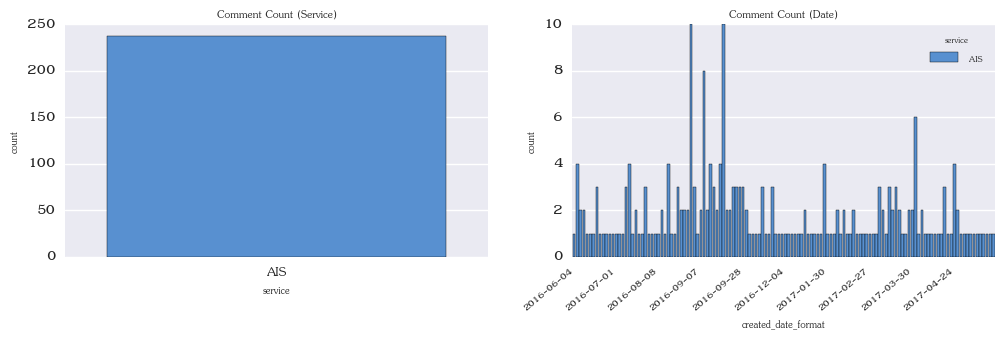

In [24]:
analyzeUserComment('AIS')

dtac has 31 comments.
Sample comment : 
‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÄ‡∏ö‡∏≠‡∏£‡πå‡∏™‡∏ß‡∏¢‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πà‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì ‡πÄ‡∏ö‡∏≠‡∏£‡πå‡∏ï‡∏≠‡∏á ‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÄ‡∏£‡∏µ‡∏¢‡∏á ‡πÄ‡∏ö‡∏≠‡∏£‡πå‡∏Ñ‡∏π‡πà ‡πÄ‡∏ö‡∏≠‡∏£‡πå‡∏™‡∏•‡∏±‡∏ö
‡∏Ñ‡∏•‡∏¥‡∏Å‡πÄ‡∏•‡∏¢! http://bit.ly/nicenumber_freud_fb
#dtacnicenumber
----
‡πÄ‡∏ô‡πá‡∏ï‡πÅ‡∏£‡∏á...‡πÅ‡∏ï‡πà‡∏ö‡∏≤‡∏á‡∏ó‡∏µ‡πÄ‡∏•‡πà‡∏ô‡πÜ‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏ô‡πá‡∏ï‡∏Å‡∏•‡∏±‡∏ö‡∏ä‡πâ‡∏≤‡∏•‡∏á ‡∏ó‡∏µ‡πà‡∏ä‡πâ‡∏≤‡∏≠‡∏≤‡∏à‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏ô‡πá‡∏ï‡πÄ‡∏ß‡∏¥‡∏£‡πå‡∏Ñ ‡πÅ‡∏ï‡πà‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏õ‡∏ï‡∏≤‡∏°‡∏Å‡∏é FUP *  ‡∏ã‡∏∂‡πà‡∏á‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏ï‡∏ô‡πÄ‡∏≠‡∏á 
‡∏Ñ‡∏•‡∏¥‡∏Å! http://bit.ly/FUP_fb_1
----
‡πÄ‡∏ô‡πá‡∏ï‡πÅ‡∏£‡∏á...‡πÅ‡∏ï‡πà‡∏ö‡∏≤‡∏á‡∏ó‡∏µ‡πÄ‡∏•‡πà‡∏ô‡πÜ‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏ô‡πá‡∏ï‡∏Å‡∏•‡∏±‡∏ö‡∏ä‡πâ‡∏≤‡∏•‡∏á ‡∏ó‡∏µ‡πà‡∏ä‡πâ‡∏≤‡∏≠‡∏≤‡∏à‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏ô‡πá‡∏ï‡πÄ‡∏ß‡∏¥‡∏£‡πå‡∏Ñ ‡πÅ‡∏ï‡πà‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏õ‡∏ï‡∏≤‡∏°‡∏Å‡∏é FUP *  ‡∏ã‡∏∂‡πà‡∏á‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ï‡∏£‡∏ß‡∏à‡∏™

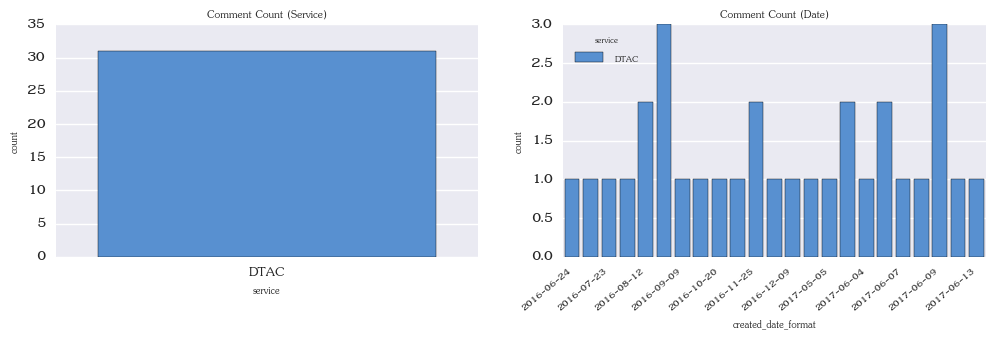

In [21]:
analyzeUserComment('dtac')

Joe KonTummada has 182 comments.
Sample comment : 
‡∏ô‡πà‡∏≤‡∏à‡∏∞‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì‡πÄ‡∏î‡∏∑‡∏≠‡∏ô5   ‡πÅ‡∏ï‡πà‡∏ß‡∏±‡∏ô‡πÑ‡∏´‡∏ô‡πÑ‡∏õ‡πÑ‡∏•‡πà‡πÄ‡∏ä‡πá‡∏Ñ‡πÄ‡∏≠‡∏≤
----
‡∏ú‡∏•‡πÄ‡∏õ‡πá‡∏ô‡∏¢‡∏±‡∏á‡πÑ‡∏á‡∏ö‡πâ‡∏≤‡∏á  ‡πÄ‡∏á‡∏µ‡∏¢‡∏ö‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏õ‡πà‡∏≤‡∏™‡∏≤‡∏Å‡πÄ‡∏•‡∏¢
----
https://m.youtube.com/watch?v=MRgk_YreX9A
----
‡πÉ‡∏ô‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ó‡∏≤‡∏á‡∏ó‡∏£‡∏π‡∏ï‡∏±‡∏î‡∏™‡∏¥‡πâ‡∏ô‡πÉ‡∏à‡πÅ‡∏ö‡∏ö‡∏ô‡∏±‡πâ‡∏ô‡∏Å‡πá‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡πÇ‡∏ó‡∏£‡∏°‡∏≤  ‡∏ú‡∏°‡∏à‡∏∞‡πÑ‡∏õ‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å  ‡πÅ‡∏•‡∏∞‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÑ‡∏ü‡∏•‡πå‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏ô‡∏±‡πâ‡∏ô‡∏î‡πâ‡∏ß‡∏¢  ‡∏à‡∏∞‡πÄ‡∏≠‡∏≤‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡∏¢‡∏ó‡∏£‡∏π  ‡∏ó‡∏µ‡πà‡πÇ‡∏Å‡∏´‡∏Å‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤  ‡∏à‡∏ö
----
‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡∏Å‡πá‡∏Ñ‡∏á‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡πà‡∏≠‡∏ô   ‡πÑ‡∏î‡πâ‡∏Ñ‡∏≥‡∏ï‡∏≠‡∏ö‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÑ‡∏´‡∏£‡πà‡∏´‡∏£‡∏∑‡∏≠‡∏î‡∏µ‡∏û‡∏≠‡∏Ñ‡πà‡∏≠‡∏¢‡∏¢‡πâ‡∏≤‡∏¢‡∏Å‡∏•‡∏±‡∏ö‡∏°‡∏≤
----
‡πÇ‡∏Å‡∏´‡∏Å‡πÅ‡∏•‡∏∞‡∏Å‡∏•‡∏±‡∏ö‡∏Ñ‡∏≥‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ  ‡∏°‡∏±‡∏ô‡πÄ‡∏•‡∏¢‡∏à‡∏∏‡∏î‡∏

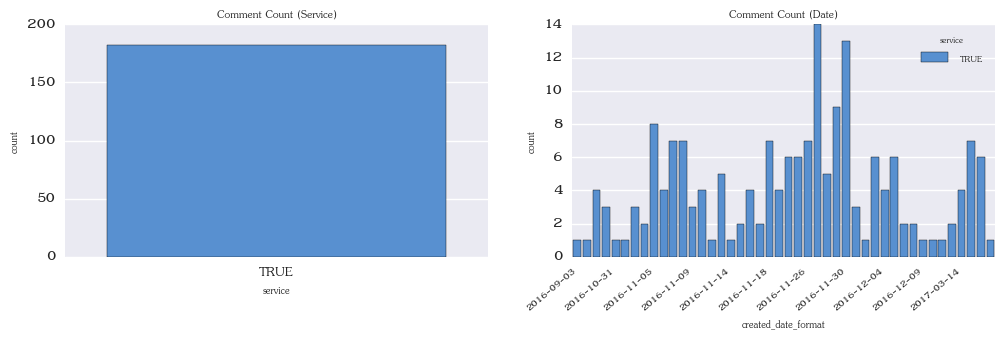

In [25]:
analyzeUserComment('Joe KonTummada')

Kawee Loysong has 14 comments.
Sample comment : 
‡∏Ç‡∏≠‡∏á‡∏ú‡∏° ‡πÄ‡∏•‡∏Ç 6 ‡πÄ‡∏¢‡πâ‡πÜ‡πÜ ‡∏á‡∏≤‡∏°‡πÜ‡πÄ‡∏•‡∏¢ ‡∏Ñ‡∏£‡∏±‡∏ö
----
‡πÅ‡∏Ñ‡πà‡∏≠‡∏¢‡∏≤‡∏Å‡∏à‡∏∞‡∏£‡∏π‡πâ ‡∏ú‡∏°‡πÄ‡∏Ñ‡∏¢‡πÉ‡∏ä‡πà‡πÅ‡∏≠‡∏£‡πå‡∏Å‡∏≤‡∏£‡πå‡∏î ‡∏ï‡πà‡∏≠‡πÄ‡∏ô‡πá‡∏ï‡πÄ‡∏Ç‡πâ‡∏≤‡∏Ñ‡∏≠‡∏°‡∏Ø ‡∏î‡∏π‡∏ó‡∏µ‡∏ß‡∏µ‡πÑ‡∏î‡πâ‡∏™‡∏∞‡∏ö‡∏≤‡∏¢‡πÜ‡πÄ‡∏õ‡πá‡∏ô‡∏´‡∏•‡∏≤‡∏¢ ‡∏ä‡∏°. ‡∏´‡∏°‡∏≤‡∏¢‡∏ñ‡∏∂‡∏á‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡πÄ‡∏õ‡πá‡∏ô ‡∏£‡∏∞‡∏ö‡∏ö 2 ‡∏à‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏ô‡∏∞ ‡πÄ‡∏î‡∏µ‡πã‡∏¢‡∏ß‡∏ô‡∏µ‡πâ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏°‡∏≤‡πÄ‡∏õ‡πá‡∏ô ‡∏£‡∏∞‡∏ö‡∏ö 3-4 ‡∏à‡∏µ ‡∏Ç‡∏≠‡∏ñ‡∏≤‡∏°‡πÄ‡∏ñ‡∏≠‡∏∞ ‡πÅ‡∏°‡πâ‡πÅ‡∏ï‡πà‡∏™‡∏°‡∏≤‡∏£‡πå‡∏ó‡πÇ‡∏ü‡∏ô ‡∏°‡∏µ‡πÄ‡∏ô‡πá‡∏ï‡∏≠‡∏¢‡∏π‡πà ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏¥‡πä‡∏Å ‡∏î‡∏π‡∏ó‡∏µ‡∏ß‡∏µ‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ ‡∏ï‡∏Å‡∏•‡∏á‡∏ô‡∏µ‡πà‡∏°‡∏±‡∏ô‡∏û‡∏±‡∏í‡∏ô‡∏≤‡πÅ‡∏ö‡∏ö‡πÉ‡∏´‡∏ô‡∏Å‡∏±‡∏ô ‡∏ö‡∏≠‡∏Å‡∏ï‡∏≤‡∏°‡∏ï‡∏£‡∏á ‡∏£‡∏∏‡πà‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡πÉ‡∏ä‡πâ 2 ‡∏à‡∏µ ‡πÄ‡∏ô‡πá‡∏ï‡∏ô‡∏µ‡πà‡πÇ‡∏Ñ‡∏ï‡∏£‡πÅ‡∏£‡∏á‡πÄ‡∏•‡∏¢ ‡πÄ‡∏î‡∏µ‡πã‡∏¢‡∏ß‡∏ô‡∏µ‡πâ 3-4 ‡∏à‡∏µ ‡∏Å‡∏≤‡∏Å‡∏°‡∏≤‡∏Å‡πÜ
----
‡πÑ‡∏≠‡∏õ

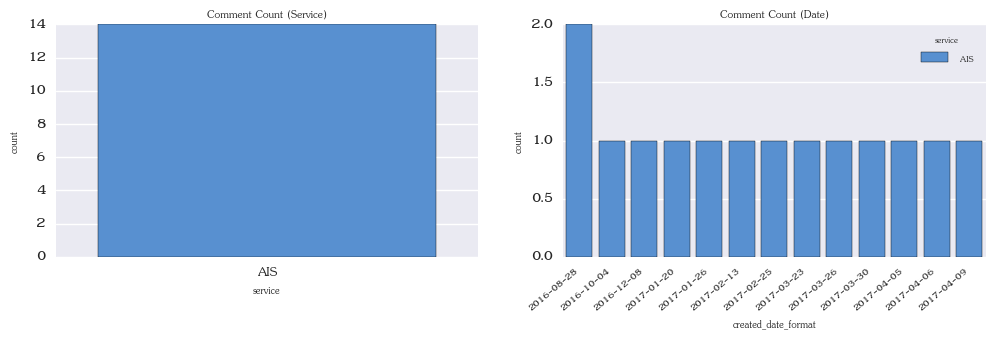

In [27]:
#Randomly select one person to analyze
sampleComment = commentDf['commenter_name'].value_counts().head(750).sample(1)
analyzeUserComment(sampleComment.index[0])

## Here is some interesting case found using the sampling function
----

Pattaraphong Sawadiruttana has 38 comments.
Sample comment : 
‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏¢‡πâ‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏¢‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÄ‡∏î‡∏¥‡∏°‡πÑ‡∏õ‡∏î‡∏µ‡πÅ‡∏ó‡∏Ñ‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏∞ ‡πÄ‡∏ô‡∏ï‡πÄ‡∏¢‡∏≠‡∏∞‡∏î‡∏µ ‡πÇ‡∏õ‡∏£‡∏•‡∏î 50% ‡∏ô‡∏≤‡∏ô12‡πÄ‡∏î‡∏∑‡∏≠‡∏ô ‡∏à‡∏≤‡∏Å 1099 ‡∏ö‡∏≤‡∏ó ‡πÄ‡∏´‡∏•‡∏∑‡∏≠ 549 ‡πÑ‡∏î‡πâ‡πÄ‡∏ô‡∏ï 40GB ‡πÄ‡∏¢‡∏≠‡∏∞‡∏°‡∏≤‡∏Å‡πÜ‡πÅ‡∏ñ‡∏°‡πÇ‡∏ó‡∏£‡∏ü‡∏£‡∏µ 600 ‡∏ô‡∏≤‡∏ó‡∏µ ‡∏Ñ‡∏∏‡πâ‡∏°‡∏ô‡∏∞‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Å‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏¢‡∏≠‡∏∑‡πà‡∏ô‡πÜ‡πÉ‡∏´‡πâ‡πÄ‡∏ô‡∏ï‡∏ô‡πâ‡∏≠‡∏¢‡∏°‡∏≤‡∏Å‡πÅ‡∏ñ‡∏°‡πÅ‡∏û‡∏á‡∏î‡πâ‡∏ß‡∏¢
----
‡πÄ‡∏î‡∏µ‡πã‡∏¢‡∏ß‡∏™‡∏±‡∏Å‡∏û‡∏±‡∏Å‡∏°‡∏µ‡πÅ‡∏ï‡πà‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏î‡∏µ‡πÅ‡∏ó‡∏Ñ‡πÅ‡∏´‡πà‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡∏Ñ‡∏≠‡∏°‡πÄ‡∏°‡∏ô‡∏ó‡πå‡∏î‡πà‡∏≤‡πÄ‡∏û‡∏µ‡∏¢‡∏ö‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏™‡∏¥ 555
----
‡πÑ‡∏≠‡πÇ‡∏ü‡∏ô‡∏Å‡πá made in China ‡∏ô‡∏∞‡∏¢‡∏π‡∏ß‡πå
----
Beats ‡πÅ‡∏û‡∏á‡πÑ‡∏õ‡∏´‡∏ô‡πà‡∏≠‡∏¢‡πÄ‡∏ô‡∏≠‡∏∞ ‡∏£‡∏∞‡∏î‡∏±‡∏ö‡πÄ‡∏£‡∏≤‡πÉ‡∏ä‡πâ JBL ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏î‡∏µ‡πÅ‡∏ï‡πà‡∏Å‡πá‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏î‡πâ‡∏£‡∏≠‡∏ß‡∏±‡∏ô‡∏•‡∏î 50% ‡∏ô‡∏∞


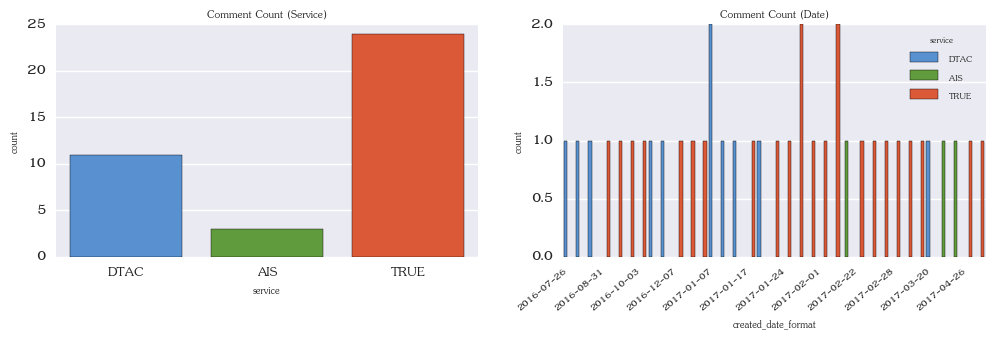

In [28]:
analyzeUserComment('Pattaraphong Sawadiruttana')

In [40]:
for i in commentDf[commentDf['commenter_name']=='Pattaraphong Sawadiruttana'].sort_values('created_date').head(10)['message'].values:
    print(i)
    print("--")

‡πÄ‡∏à‡πã‡∏á‡∏°‡∏≤‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å ‡∏Ñ‡∏≠‡∏ô‡πÄ‡∏ü‡∏¥‡∏£‡πå‡∏°!!! ‡∏ü‡∏£‡∏µ‡πÜ‡πÜ‡πÜ‡πÜ‡∏Ñ‡πà‡∏≤‡πÄ‡∏ô‡∏ï ‡∏ü‡∏±‡∏á‡πÄ‡∏û‡∏•‡∏á‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∏‡∏Ç‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡πÉ‡∏ô3‡πÇ‡∏•‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å
--
‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏¢‡πâ‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏¢‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÄ‡∏î‡∏¥‡∏°‡πÑ‡∏õ‡∏î‡∏µ‡πÅ‡∏ó‡∏Ñ‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏∞ ‡πÄ‡∏ô‡∏ï‡πÄ‡∏¢‡∏≠‡∏∞‡∏î‡∏µ ‡πÇ‡∏õ‡∏£‡∏•‡∏î 50% ‡∏ô‡∏≤‡∏ô12‡πÄ‡∏î‡∏∑‡∏≠‡∏ô ‡∏à‡∏≤‡∏Å 1099 ‡∏ö‡∏≤‡∏ó ‡πÄ‡∏´‡∏•‡∏∑‡∏≠ 549 ‡πÑ‡∏î‡πâ‡πÄ‡∏ô‡∏ï 40GB ‡πÄ‡∏¢‡∏≠‡∏∞‡∏°‡∏≤‡∏Å‡πÜ‡πÅ‡∏ñ‡∏°‡πÇ‡∏ó‡∏£‡∏ü‡∏£‡∏µ 600 ‡∏ô‡∏≤‡∏ó‡∏µ ‡∏Ñ‡∏∏‡πâ‡∏°‡∏ô‡∏∞‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Å‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏¢‡∏≠‡∏∑‡πà‡∏ô‡πÜ‡πÉ‡∏´‡πâ‡πÄ‡∏ô‡∏ï‡∏ô‡πâ‡∏≠‡∏¢‡∏°‡∏≤‡∏Å‡πÅ‡∏ñ‡∏°‡πÅ‡∏û‡∏á‡∏î‡πâ‡∏ß‡∏¢
--
‡πÄ‡∏ô‡∏ï‡πÑ‡∏°‡πà‡∏Ñ‡πà‡∏≠‡∏¢‡∏î‡∏µ‡πÄ‡∏•‡∏¢‡∏≠‡πà‡∏∞ ‡∏Ç‡∏∂‡πâ‡∏ô R ‡∏ï‡∏•‡∏≠‡∏î ‡∏ó‡∏±‡πâ‡∏á‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏ó‡∏µ‡πà‡∏ö‡πâ‡∏≤‡∏ô ‡∏î‡∏µ‡∏ô‡∏∞‡∏•‡∏≠‡∏á‡∏ã‡∏∑‡πâ‡∏≠‡∏ã‡∏¥‡∏°‡πÄ‡∏ï‡∏¥‡∏°‡πÄ‡∏á‡∏¥‡∏ô‡∏°‡∏≤‡∏•‡∏≠‡∏á‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏Å‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏¢

He was first using AIS. Then he is considering to switch to Dtac, but later change his mind and go to True.

------------------


‡∏Å‡∏∏‡∏ç‡πÅ‡∏à‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡πÄ‡∏Ç‡πá‡∏°‡∏ó‡∏¥‡∏®‡∏´‡∏±‡∏ß‡πÉ‡∏à has 10 comments.
Sample comment : 
‡πÅ‡∏≠‡∏î‡∏Ñ‡∏±‡∏ü‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏ï‡∏≠‡∏ö‡∏î‡πâ‡∏ß‡∏¢ ‡∏Ñ‡∏∑‡∏≠‡∏™‡∏°‡∏±‡∏Ñ‡∏£‡πÄ‡∏ô‡πá‡∏ï‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô399‡πÑ‡∏õ‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡∏∑‡πâ‡∏≠‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÇ‡∏õ‡∏£‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏≠‡πà‡∏Ñ‡∏±‡∏ü ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà25‡∏°‡∏¥‡∏ñ‡∏∏‡∏ô‡∏≤‡∏¢‡∏ô       59 ‡∏ô‡∏¥‡πà‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà5 ‡∏Å‡∏£‡∏Å‡∏é‡∏≤‡∏Ñ‡∏° ‡πÄ‡∏≠‡∏á‡∏ó‡∏≥‡πÑ‡∏°‡πÉ‡∏ö‡∏ö‡∏¥‡∏•‡πÅ‡∏à‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏á‡∏ß‡∏î‡∏°‡∏≤‡πÅ‡∏•‡πâ‡∏ß‡∏≠‡πà‡∏Ñ‡∏±‡∏ü‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏ñ‡∏∂‡∏á‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÄ‡∏•‡∏¢ ‡πÅ‡∏ñ‡∏°‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÉ‡∏ä‡πâ‡∏ô‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡πÇ‡∏ó‡∏£‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡πá‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏ñ‡∏∂‡∏á‡πÇ‡∏ó‡∏£‡∏ü‡∏£‡∏µ‡∏ó‡∏∏‡∏Å‡πÄ‡∏Ñ‡∏£‡∏∑‡∏≠‡∏Ç‡πà‡∏≤‡∏¢150‡∏ô‡∏≤‡∏ó‡∏µ‡πÄ‡∏•‡∏¢‡πÅ‡∏ï‡πà‡πÉ‡∏ô‡πÉ‡∏ö‡∏ö‡∏¥‡∏•‡∏ô‡∏µ‡πà‡πÅ‡∏à‡πâ‡∏á‡∏£‡∏≤‡∏Ñ‡∏≤‡πÄ‡∏Å‡∏¥‡∏ô‡∏à‡∏¥‡∏á‡πÑ‡∏õ‡πÄ‡∏¢‡∏≠‡∏∞‡∏°‡∏≤‡∏Å‡∏ô‡∏¥‡πà‡πÅ‡∏Ñ‡πà‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÅ‡∏£‡∏Å‡∏ô‡∏∞‡∏Ñ

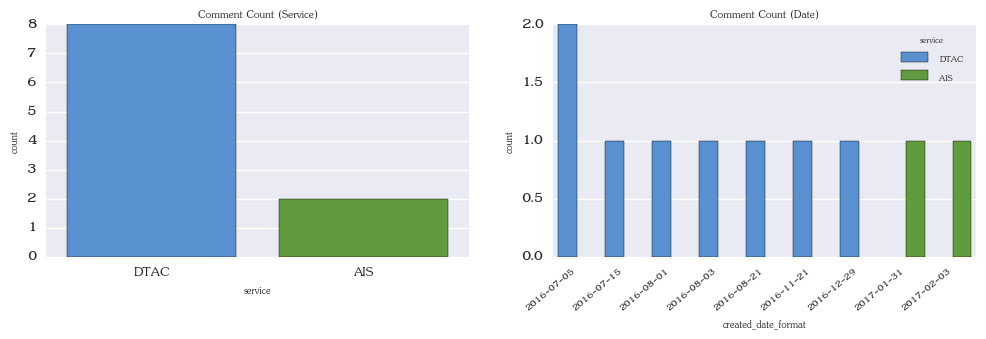

In [30]:
analyzeUserComment('‡∏Å‡∏∏‡∏ç‡πÅ‡∏à‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡πÄ‡∏Ç‡πá‡∏°‡∏ó‡∏¥‡∏®‡∏´‡∏±‡∏ß‡πÉ‡∏à')

## He is not happy with dtac facbook admin.
------------

In [39]:
for i in commentDf[commentDf['commenter_name']=='‡∏Å‡∏∏‡∏ç‡πÅ‡∏à‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï ‡πÄ‡∏Ç‡πá‡∏°‡∏ó‡∏¥‡∏®‡∏´‡∏±‡∏ß‡πÉ‡∏à'].sort_values('created_date')['message'].values:
    print(i)
    print("--")

‡πÅ‡∏≠‡∏î‡∏ó‡∏≥‡πÑ‡∏°‡πÉ‡∏ä‡πâ‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÄ‡∏ô‡πá‡∏ï399‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πà 25‡∏°‡∏¥‡∏ñ‡∏∏‡∏ô‡∏≤‡∏¢‡∏ô 59 ‡πÄ‡∏ô‡∏¥‡πà‡∏¢ ‡∏ó‡∏≥‡πÑ‡∏°‡∏ß‡∏±‡∏ô‡∏ô‡∏¥‡πà‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà5 ‡∏Å‡∏£‡∏Å‡∏é‡∏≤‡∏Ñ‡∏° ‡πÉ‡∏ö‡∏ö‡∏¥‡∏•‡πÅ‡∏à‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏á‡∏ß‡∏î‡∏°‡∏≤‡πÅ‡∏•‡πâ‡∏ß‡∏≠‡πà ‡∏ó‡∏±‡πâ‡∏á‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏Ñ‡∏ö‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÄ‡∏•‡∏¢‡πÅ‡∏•‡∏∞‡πÑ‡∏°‡πà‡∏Ñ‡πà‡∏≠‡∏¢‡πÑ‡∏î‡πâ‡πÉ‡∏ä‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏ó‡∏≥‡πÑ‡∏°‡∏¢‡∏≠‡∏î‡πÄ‡∏Å‡∏¥‡∏ô‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏¢‡∏≠‡∏∞‡∏≠‡πà
--
‡πÅ‡∏≠‡∏î‡∏Ñ‡∏±‡∏ü‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏ï‡∏≠‡∏ö‡∏î‡πâ‡∏ß‡∏¢ ‡∏Ñ‡∏∑‡∏≠‡∏™‡∏°‡∏±‡∏Ñ‡∏£‡πÄ‡∏ô‡πá‡∏ï‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô399‡πÑ‡∏õ‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡∏∑‡πâ‡∏≠‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÇ‡∏õ‡∏£‡∏£‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏≠‡πà‡∏Ñ‡∏±‡∏ü ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà25‡∏°‡∏¥‡∏ñ‡∏∏‡∏ô‡∏≤‡∏¢‡∏ô       59 ‡∏ô‡∏¥‡πà‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà5 ‡∏Å‡∏£‡∏Å‡∏é‡∏≤‡∏Ñ‡∏° ‡πÄ‡∏≠‡∏á‡∏ó‡∏≥‡πÑ‡∏°‡πÉ‡∏ö‡∏ö‡∏¥‡∏•‡πÅ‡∏à‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏á‡∏ß‡∏î‡∏°‡∏≤‡πÅ‡∏•‡πâ‡∏ß‡∏≠‡πà‡∏Ñ‡∏±‡∏ü‡∏¢‡∏±‡∏á‡πÑ‡∏°‡

## Here he is complaining about bad signal. If we have social media listener, we might prevent these group of customer from leaving.
------------

In [41]:
for i in commentDf[commentDf['commenter_name']=='Tanawat Setthakorn'].sort_values('created_date')['message'].values:
    print(i)
    print("--")

‡∏ó‡∏≥‡πÑ‡∏°‡∏°‡∏±‡∏ô‡πÄ‡∏ô‡∏ï‡∏ä‡πâ‡∏≤‡∏°‡∏≤‡∏Å‡πÄ‡∏•‡∏¢‡∏≠‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ‡∏ú‡∏°‡πÉ‡∏ä‡πâ‡πÇ‡∏õ‡∏£ 1299 go no limit ‡∏≠‡∏¢‡∏π‡πà
--
‡∏ä‡πà‡∏ß‡∏¢‡∏°‡∏≤‡∏ï‡∏≠‡∏ö‡∏ú‡∏°‡∏´‡∏ô‡πà‡∏≠‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö
--
‡∏ú‡∏°‡∏à‡πà‡∏≤‡∏¢‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡∏ñ‡∏π‡∏Å‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö 1299!!!
--
‡πÑ‡∏°‡πà‡∏á‡∏±‡πâ‡∏ô‡∏¢‡πâ‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏¢‡πÅ‡∏ô‡πà!!
--
‡∏ó‡∏≥‡πÑ‡∏°‡∏≠‡∏∞ ‡∏ú‡∏°‡∏≠‡∏∏‡∏ï‡∏™‡πà‡∏≤‡∏´‡πå‡∏¢‡πâ‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏¢‡∏°‡∏≤‡∏´‡∏≤‡∏Ñ‡∏∏‡∏ì ‡πÅ‡∏ï‡πà‡∏Ñ‡∏∏‡∏ì‡∏ó‡∏≥‡∏Å‡∏±‡∏ö‡∏ú‡∏°‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡πÑ‡∏î‡πâ‡∏¢‡∏±‡∏á‡πÑ‡∏á ‡∏ú‡∏°‡πÉ‡∏ä‡πâ‡πÇ‡∏õ‡∏£ 1299 go no limit ‡∏ú‡∏°‡∏î‡∏π‡∏´‡∏ô‡∏±‡∏á‡∏ó‡∏µ‡πà 720 ‡∏Å‡∏£‡∏∞‡∏ï‡∏∏‡∏Å ‡∏ú‡∏°‡∏Å‡πá‡πÑ‡∏°‡πà‡∏ß‡πà‡∏≤‡∏≠‡∏∞‡πÑ‡∏£ ‡πÅ‡∏ï‡πà‡∏û‡∏≠‡∏ú‡∏°‡∏•‡∏î‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡∏•‡∏á‡πÄ‡∏´‡∏•‡∏∑‡∏≠ 480 ‡∏¢‡∏±‡∏á‡∏à‡∏∞‡∏Å‡∏£‡∏∞‡∏ï‡∏∏‡∏Å‡∏≠‡∏µ‡∏Å ‡∏°‡∏±‡∏ô‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß‡∏ô‡∏∞ ‡∏ú‡∏°‡∏Ç‡∏≠‡∏£‡πâ‡∏≠‡∏á‡πÅ‡∏•‡∏∞ ‡∏ä‡πà‡∏ß‡∏¢‡∏û‡∏±‡∏í‡∏ô‡∏≤‡∏à‡∏£‡∏¥‡∏á‡πÜ‡πÄ‡∏ñ‡∏≠‡∏∞  ‡∏ú‡∏°‡∏≠‡∏∏‡∏ï‡∏™‡πà‡∏≤‡∏´‡πå‡πÄ‡∏≠‡∏≤‡πÄ‡∏Ñ‡∏£‡∏∑‡∏≠‡∏Ç‡πà‡∏≤‡∏¢‡∏Ñ‡∏∏‡∏ì‡π

In [44]:
for i in commentDf[commentDf['commenter_name']=='‡∏ú‡πà‡∏≤‡∏ô‡∏°‡∏≤ ‡πÅ‡∏Ñ‡πà‡πÉ‡∏´‡πâ‡∏à‡∏≥'].sort_values('created_date')['message'].values:
    print(i)
    print("--")

‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡πÄ‡∏Å‡πà‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡πÑ‡∏°‡πà‡∏î‡∏π‡πÅ‡∏• ‡πÉ‡∏ä‡πâ‡∏°‡∏≤‡πÄ‡∏Å‡∏∑‡∏≠‡∏ö10‡∏õ‡∏µ ‡πÇ‡∏õ‡∏£‡πÅ‡∏û‡∏á ‡∏û‡∏≠‡∏¢‡πâ‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏¢‡∏õ‡∏±‡πä‡∏õ ‡πÄ‡∏û‡∏¥‡πà‡∏á‡∏à‡∏∞‡∏°‡∏≤‡∏ö‡∏≠‡∏Å‡πÇ‡∏õ‡∏£‡∏•‡∏î50% ‡∏°‡∏±‡∏ô‡∏ô‡πà‡∏≤‡∏°‡∏±‡πâ‡∏¢‡∏•‡πà‡∏∞
--
‡πÑ‡∏´‡∏ô‡∏ö‡∏≠‡∏Å‡πÄ‡∏ï‡πá‡∏°‡∏™‡∏õ‡∏µ‡∏î 3G ‡∏à‡∏∞‡∏´‡∏°‡∏î‡∏Å‡πà‡∏≠‡∏ô 30 ‡∏ß‡∏±‡∏ô‡∏≠‡∏¢‡∏π‡πà‡πÄ‡∏´‡∏£‡∏≠‡∏Ñ‡πà‡∏∞
--
‡∏°‡∏±‡∏ô‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ó‡∏≤‡∏™‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ï‡∏¥‡∏Ñ‡∏±‡∏ö ‡∏à‡∏£‡∏î‡∏õ‡∏±‡∏Å‡∏Å‡∏≤‡πÄ‡∏ã‡πá‡∏ô‡∏™‡∏±‡∏ç‡∏ç‡∏≤12‡πÄ‡∏î‡∏∑‡∏≠‡∏ô ‡∏ï‡∏≠‡∏ô‡∏à‡∏∞‡πÄ‡∏≠‡∏≤‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏ô‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏∏‡∏Å‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Ñ‡∏±‡∏ö ‡∏û‡∏≠‡πÄ‡∏Å‡∏¥‡∏î‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏à‡∏°‡∏≤‡∏Å‡∏∞‡∏ó‡∏≥‡∏≠‡∏∞‡πÑ‡∏£‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÅ‡∏•‡πâ‡∏ß ‡∏ï‡∏≠‡∏ö‡∏™‡∏±‡πâ‡∏ô‡πÜ‡∏á‡πà‡∏≤‡∏¢ ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô‡∏ó‡∏∏‡∏Å‡∏Ñ‡πà‡∏≤‡∏¢‡∏Ñ‡∏±‡∏ö
--
‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏î‡πâ‡∏™‡∏±‡∏Å‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏ó‡∏≥‡∏á‡∏±‡∏¢ ‡∏Ñ‡∏±‡∏ö‡πÄ‡∏´‡πá‡∏ô‡∏ö‡∏≠‡∏Å‡∏Ç‡∏≠‡∏á‡∏´‡∏°‡∏î ‡πÑ‡∏´‡∏ô‡πÜ‡∏à‡∏∞‡∏à‡∏±‡∏î‡∏ó‡∏±‡πâ‡∏á‡∏ó‡∏µ‡πÉ‡∏´

## And much more. 
-------------------
We can know users story from these comments. Imagine combine with machine learning model that can detect whether the comment is unhappy or not. We can prevent a large portion of user from leaving.